## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load the dataset

In [2]:
df = pd.read_csv("data_202512.csv", low_memory=False, encoding='ISO-8859-1')

In [3]:
df.head(3)

STUDENT_NUMBER    STUDENT_NAME GENDER HOME_LANGUAGE LANGUAGE_NAME  \
0       222193913  MISS LL MTEMBU      F             K         XHOSA   
1       220208328  MS KL KHOHLISO      F             K         XHOSA   
2       221523715   MR L VININDWA      M             K         XHOSA   

  ETHNIC_GROUP_NAME STATS_ETHNIC_GROUP                    BIRTHDATE  \
0             BLACK            AFRICAN  2004-10-02 00:00:00.0000000   
1             BLACK            AFRICAN  1999-11-12 00:00:00.0000000   
2             BLACK            AFRICAN  1993-10-10 00:00:00.0000000   

  STUDENT_TYPE QUALIFICATION_CODE  ... SUCCESS AMOUNT_AWARDED  \
0            N             WS5585  ...       1         4400.0   
1            N             WS7050  ...       0        69600.0   
2            N             WS5046  ...       0        10854.0   

  NSFAS_BURSARY_Y_N NUMBER_MATRIC_SUBJECTS MATRIC_SYMBOL MATRIC_RATIO  \
0                 N                      7          32.0     0.218750   
1                 Y                      7          26.0     0.269231   
2                 N                      7          36.0     0.194444   

         RESIDENCE  EXAM_MARK FINAL_MARK  TEST_MARK  
0              NaN  49.142857  57.600000  54.314815  
1  CONNISTON COURT  32.000000  44.000000  51.260000  
2              NaN   0.000000  11.333333  15.000000  

[3 rows x 43 columns]

In [37]:
# Drop personal identifiers
df = df.drop(columns=['STUDENT_NUMBER', 'STUDENT_NAME', 'STUDENT_EMAIL', 'TITLE', 'INITIALS', 'FIRST_NAMES', 'SURNAME'])

# Compare Pass and Fail Rates Across Different Categories

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded into the 'df' dataFrame
# Replace categorical_column with the column you want to analyze, e.g., 'GENDER', 'FACULTY_SCHOOL_NAME'
categorical_column = 'GENDER'  # Example

pass_fail_by_category = df.groupby([categorical_column, 'PASS_FAIL']).size().unstack()
pass_fail_by_category['Total'] = pass_fail_by_category.sum(axis=1)
pass_fail_by_category['Pass Rate'] = pass_fail_by_category['P'] / pass_fail_by_category['Total']
pass_fail_by_category['Fail Rate'] = pass_fail_by_category['F'] / pass_fail_by_category['Total']

print(pass_fail_by_category[['Pass Rate', 'Fail Rate']])

# # Visualizing the pass and fail rates
# plt.figure(figsize=(10, 6))
# pass_fail_by_category[['Pass Rate', 'Fail Rate']].plot(kind='bar', stacked=True)
# plt.title(f'Pass and Fail Rates by {categorical_column}')
# plt.ylabel('Rate')
# plt.show()


PASS_FAIL  Pass Rate  Fail Rate
GENDER                         
F           0.820180   0.179820
M           0.708647   0.291353


# Explore the Relationship Between Student Performance and Other Variables

In [38]:
df.columns

Index(['GENDER', 'HOME_LANGUAGE', 'LANGUAGE_NAME', 'ETHNIC_GROUP_NAME',
       'STATS_ETHNIC_GROUP', 'BIRTHDATE', 'STUDENT_TYPE', 'QUALIFICATION_CODE',
       'QUALIFICATION_NAME', 'FTEN_STATUS_THIS_YEAR', 'DEPARTMENT_NAME',
       'FACULTY_SCHOOL_NAME', 'OFFERING_TYPE_CODE', 'OFFERING_TYPE',
       'CAMPUS_NAME', 'ACADEMIC_YEAR', 'QUALIFICATION_TYPE',
       'NATIONAL_LEVEL_DESC', 'SECONDARY_SCHOOL', 'SECONDARY_SCHOOL_NAME',
       'TRANSACTION_DATE', 'RESULT_DESCRIPTION', 'PASS_FAIL', 'MARITAL_STATUS',
       'MATRIC_TYPE_DESCRIPTION', 'STUDENT_FOUNDATION', 'SUCCESS',
       'AMOUNT_AWARDED', 'NSFAS_BURSARY_Y_N', 'NUMBER_MATRIC_SUBJECTS',
       'MATRIC_SYMBOL', 'MATRIC_RATIO', 'RESIDENCE', 'EXAM_MARK', 'FINAL_MARK',
       'TEST_MARK'],
      dtype='object')

# Statistical Tests Categorical

In [39]:
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()

In [97]:
from scipy.stats import chi2_contingency

# Store results
results = []
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['SUCCESS'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    results.append({
        "Categorical Features": column,
        "Chi-Squared": chi2,
        "P-Value": p,
        "Degrees of Freedom": dof
    })

    print(f'Chi-Squared Test: {column} vs SUCCESS')
    print(f'Chi² Statistic : {chi2:.4f}')
    print(f'P-Value        : {p:.4f}')
    print(f'Degrees of Freedom: {dof}')
    print('-----------------------------------')


Chi-Squared Test: GENDER vs SUCCESS
Chi² Statistic : 1810.2842
P-Value        : 0.0000
Degrees of Freedom: 1
-----------------------------------
Chi-Squared Test: HOME_LANGUAGE vs SUCCESS
Chi² Statistic : 114.5550
P-Value        : 0.0000
Degrees of Freedom: 15
-----------------------------------
Chi-Squared Test: LANGUAGE_NAME vs SUCCESS
Chi² Statistic : 114.5550
P-Value        : 0.0000
Degrees of Freedom: 15
-----------------------------------
Chi-Squared Test: ETHNIC_GROUP_NAME vs SUCCESS
Chi² Statistic : 58.2912
P-Value        : 0.0000
Degrees of Freedom: 15
-----------------------------------
Chi-Squared Test: STATS_ETHNIC_GROUP vs SUCCESS
Chi² Statistic : 12.9214
P-Value        : 0.0048
Degrees of Freedom: 3
-----------------------------------
Chi-Squared Test: BIRTHDATE vs SUCCESS
Chi² Statistic : 9590.7338
P-Value        : 0.0000
Degrees of Freedom: 6667
-----------------------------------
Chi-Squared Test: STUDENT_TYPE vs SUCCESS
Chi² Statistic : 0.0000
P-Value        : 1.0000


In [99]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="P-Value")

# Show most significant relationships
print("\nSummary of Chi-Squared Test Results:")
print(results_df)


Summary of Chi-Squared Test Results:
       Categorical Features    Chi-Squared        P-Value  Degrees of Freedom
0                    GENDER    1810.284182   0.000000e+00                   1
21                PASS_FAIL  104960.283085   0.000000e+00                   1
20       RESULT_DESCRIPTION  104966.000000   0.000000e+00                  14
19         TRANSACTION_DATE    6628.859914   0.000000e+00                 633
15       QUALIFICATION_TYPE    4536.887264   0.000000e+00                  13
14              CAMPUS_NAME    1570.443247   0.000000e+00                   3
12       OFFERING_TYPE_CODE    2561.088648   0.000000e+00                  18
11      FACULTY_SCHOOL_NAME    6427.232159   0.000000e+00                  17
10          DEPARTMENT_NAME    8413.758137   0.000000e+00                  68
13            OFFERING_TYPE    2561.088648   0.000000e+00                  18
8        QUALIFICATION_NAME   11415.486291   0.000000e+00                 219
26                RESIDENC

C:\Users\smmakola\AppData\Local\Temp\2\ipykernel_1280\2339352423.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




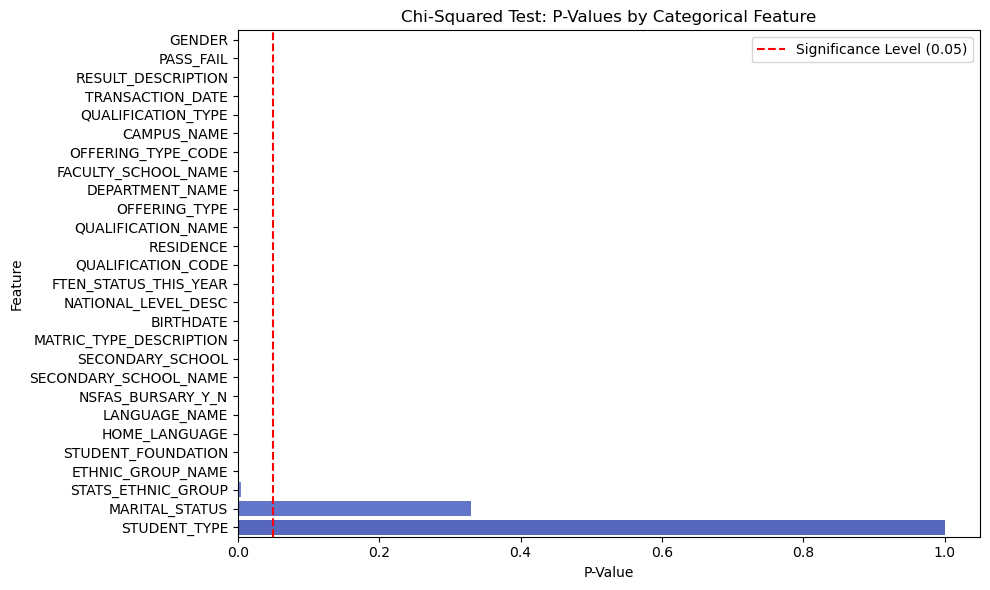

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="P-Value", y="Categorical Features", palette="coolwarm_r")
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title("Chi-Squared Test: P-Values by Categorical Feature")
plt.xlabel("P-Value")
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
import plotly.express as px

fig = px.bar(results_df,
             x='P-Value',
             y='Categorical Features',
             orientation='h',
             title='Chi-Squared P-Values by Feature',
             color='P-Value',
             color_continuous_scale='Viridis_r')

fig.add_vline(x=0.05, line_dash="dash", line_color="red")
fig.show()


In [103]:
results_df = results_df.drop(index=22)

In [112]:
df_significant= results_df[results_df['P-Value'] < 0.05]

In [113]:
df_significant

Categorical Features    Chi-Squared        P-Value  Degrees of Freedom
0                    GENDER    1810.284182   0.000000e+00                   1
21                PASS_FAIL  104960.283085   0.000000e+00                   1
20       RESULT_DESCRIPTION  104966.000000   0.000000e+00                  14
19         TRANSACTION_DATE    6628.859914   0.000000e+00                 633
15       QUALIFICATION_TYPE    4536.887264   0.000000e+00                  13
14              CAMPUS_NAME    1570.443247   0.000000e+00                   3
12       OFFERING_TYPE_CODE    2561.088648   0.000000e+00                  18
11      FACULTY_SCHOOL_NAME    6427.232159   0.000000e+00                  17
10          DEPARTMENT_NAME    8413.758137   0.000000e+00                  68
13            OFFERING_TYPE    2561.088648   0.000000e+00                  18
8        QUALIFICATION_NAME   11415.486291   0.000000e+00                 219
26                RESIDENCE    5254.309042   0.000000e+00                 877
7        QUALIFICATION_CODE   13331.413251   0.000000e+00                 476
9     FTEN_STATUS_THIS_YEAR    1243.490709  2.685552e-269                   3
16      NATIONAL_LEVEL_DESC    1213.312709  9.479310e-263                   3
5                 BIRTHDATE    9590.733797  5.580463e-111                6667
23  MATRIC_TYPE_DESCRIPTION     470.381490   4.417421e-93                  12
17         SECONDARY_SCHOOL    4444.181012   2.349565e-65                2939
18    SECONDARY_SCHOOL_NAME    4402.288968   3.786530e-65                2907
25        NSFAS_BURSARY_Y_N     103.550813   2.538006e-24                   1
2             LANGUAGE_NAME     114.554976   2.141562e-17                  15
1             HOME_LANGUAGE     114.554976   2.141562e-17                  15
24       STUDENT_FOUNDATION      68.105015   1.550159e-16                   1
3         ETHNIC_GROUP_NAME      58.291241   4.948265e-07                  15
4        STATS_ETHNIC_GROUP      12.921419   4.809661e-03                   3

## Statistical Test Numerical



In [71]:
group_pass = df[df['PASS_FAIL'] == 'P']
group_fail = df[df['PASS_FAIL'] == 'F']
# Select only numeric columns (int, float, etc.)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()


In [73]:
numeric_cols = [col for col in numeric_cols if col != 'PASS_FAIL']
print("Numeric Columns:")
print(numeric_cols)

Numeric Columns:
['ACADEMIC_YEAR', 'SUCCESS', 'AMOUNT_AWARDED', 'NUMBER_MATRIC_SUBJECTS', 'MATRIC_SYMBOL', 'MATRIC_RATIO', 'EXAM_MARK', 'FINAL_MARK', 'TEST_MARK', 'AGE']


In [84]:
df_corr = df.copy()
df_corr['PASS_FAIL_ENC'] = df_corr['PASS_FAIL'].map({'FAIL': 0, 'PASS': 1})


In [86]:
# Get numeric columns again
numeric_cols = df_corr.select_dtypes(include='number').columns.tolist()

# Remove target itself if included
numeric_cols = [col for col in numeric_cols if col != 'SUCCESS']

# Compute correlation
correlations = df_corr[numeric_cols].corrwith(df_corr['SUCCESS']).sort_values(ascending=False)

# Convert to DataFrame for easier plotting
corr_df = correlations.reset_index()
corr_df.columns = ['Feature', 'Correlation']


C:\Users\smmakola\AppData\Local\Temp\2\ipykernel_1280\1972058321.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


posx and posy should be finite values
posx and posy should be finite values


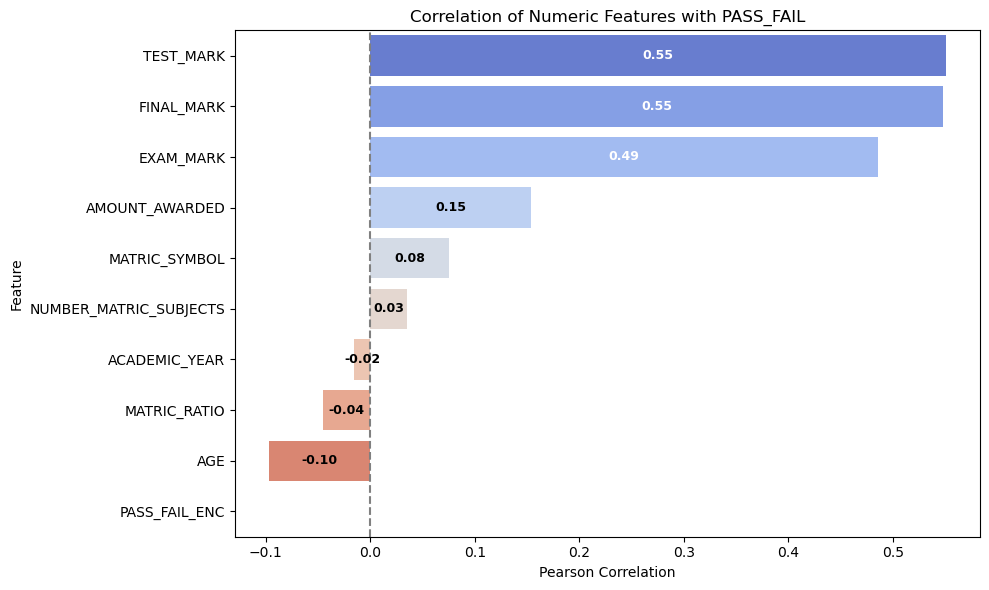

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort features by correlation
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=corr_df, x='Correlation', y='Feature', palette='coolwarm')

# Add vertical reference line
plt.axvline(0, color='gray', linestyle='--')

# Add data labels *inside* the bars
for i, row in corr_df.iterrows():
    ax.text(row['Correlation'] * 0.5,  # Middle of the bar
            i,
            f"{row['Correlation']:.2f}",
            color='white' if abs(row['Correlation']) > 0.2 else 'black',  # Contrast
            ha='center',
            va='center',
            fontsize=9,
            fontweight='bold')

plt.title('Correlation of Numeric Features with PASS_FAIL')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# DATA PREPROCESSING

## Import Libraries

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from datetime import datetime
import pickle
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import LabelEncoder

## Convert BIRTHDATE to datetime

In [115]:
df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'], errors='coerce')

In [ ]:
df

## Calculate AGE (Current Year - Birth Year)

In [55]:
current_year = datetime.now().year
df['AGE'] = current_year - df['BIRTHDATE'].dt.year

## Handle Missing or Invalid BIRTHDATE (Replace with Mean Age)

In [159]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])


ETHNIC_GROUP_NAME              1
STATS_ETHNIC_GROUP             1
SECONDARY_SCHOOL            3036
MATRIC_TYPE_DESCRIPTION        7
AMOUNT_AWARDED             11073
NSFAS_BURSARY_Y_N          11073
MATRIC_SYMBOL                812
RESIDENCE                  25446
EXAM_MARK                  20488
FINAL_MARK                  1634
TEST_MARK                    949
SCHOOL_FREQ_ENC             3520
dtype: int64


In [56]:
mean_age = df['AGE'].mean()
df['AGE'].fillna(mean_age)

0         21
1         26
2         32
3         31
4         24
          ..
104961    29
104962    26
104963    25
104964    23
104965    24
Name: AGE, Length: 104966, dtype: int32

## Drop Unnecessary Columns

In [121]:
# columns_to_drop = [
#     'QUALIFICATION_CODE', 'QUALIFICATION_NAME',
#     'FACULTY_SCHOOL_NAME', 'SECONDARY_SCHOOL_NAME', 'RESULT_DESCRIPTION', 'SECONDARY_SCHOOL',
#     'PASS_FAIL', 'STUDENT_NUMBER', 'STUDENT_NAME', 'ACADEMIC_YEAR', 'TITLE', 'INITIALS',
#     'BIRTHDATE', 'DEPARTMENT_NAME', 'OFFERING_TYPE_CODE', 'TRANSACTION_DATE', 'QUALIFICATION_TYPE',
#     'STATS_ETHNIC_GROUP', 'FIRST_NAMES', 'SURNAME', 'FINAL_MARK', 'MARITAL_STATUS','HOME_LANGUAGE','STUDENT_EMAIL','EXAM_MARK'
# ]

In [116]:
target = 'SUCCESS'

# Step 1: Drop known identifiers
identifier_cols = ['STUDENT_NUMBER', 'STUDENT_NAME', 'STUDENT_EMAIL', 'TITLE', 'INITIALS', 'FIRST_NAMES', 'SURNAME']
df.drop(columns=identifier_cols, inplace=True, errors='ignore')

## Check high null percentage


In [117]:
null_threshold = 0.5
null_cols = df.columns[df.isnull().mean() > null_threshold].tolist()

## Low variance columns (only one unique value)

In [118]:
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]

## Weak correlation for numeric features

In [119]:
numeric_cols = df.select_dtypes(include=np.number).columns.drop(target)
correlations = df[numeric_cols].corrwith(df[target]).abs()
weak_corr_cols = correlations[correlations < 0.05].index.tolist()

## High p-value for categorical features

In [123]:
# Get list of categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
target = 'SUCCESS'

# Drop rows with missing target
df = df.dropna(subset=[target])

# Ensure SUCCESS is categorical
df[target] = df[target].astype(str)

# Run Chi-squared test
chi2_results = []

for col in cat_cols:
    try:
        contingency_table = pd.crosstab(df[col], df[target])
        if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
            continue  # Skip if not enough variability

        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results.append((col, p))
    except Exception as e:
        print(f"Skipped {col} due to error: {e}")

In [124]:
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'P-value'])
chi2_df['Significant'] = chi2_df['P-value'] < 0.05

In [126]:
significant_features = chi2_df[chi2_df['Significant']]['Feature'].tolist()
insignificant_features = chi2_df[~chi2_df['Significant']]['Feature'].tolist()


### Combine all columns to consider dropping

In [128]:
cols_to_drop = set(null_cols + low_variance_cols + weak_corr_cols + insignificant_features)

In [129]:
# Show final list
print("🔍 Suggested columns to drop:")
for col in cols_to_drop:
    print(f" - {col}")

🔍 Suggested columns to drop:
 - MATRIC_RATIO
 - STUDENT_TYPE
 - ACADEMIC_YEAR
 - MARITAL_STATUS
 - NUMBER_MATRIC_SUBJECTS


In [130]:
cols_to_drop = [
    'MATRIC_RATIO',
    'STUDENT_TYPE',
    'ACADEMIC_YEAR',
    'MARITAL_STATUS',
    'NUMBER_MATRIC_SUBJECTS'
]

df = df.drop(columns=cols_to_drop, errors='ignore')


## Identify categorical columns

In [143]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104966 entries, 0 to 104965
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   GENDER                   104966 non-null  object        
 1   HOME_LANGUAGE            104966 non-null  object        
 2   LANGUAGE_NAME            104966 non-null  object        
 3   ETHNIC_GROUP_NAME        104965 non-null  object        
 4   STATS_ETHNIC_GROUP       104965 non-null  object        
 5   BIRTHDATE                104966 non-null  datetime64[ns]
 6   QUALIFICATION_CODE       104966 non-null  object        
 7   QUALIFICATION_NAME       104966 non-null  object        
 8   FTEN_STATUS_THIS_YEAR    104966 non-null  object        
 9   DEPARTMENT_NAME          104966 non-null  object        
 10  FACULTY_SCHOOL_NAME      104966 non-null  object        
 11  OFFERING_TYPE_CODE       104966 non-null  object        
 12  OFFERING_TYPE   

In [147]:

X = df.drop(columns=['SUCCESS'])
y = df['SUCCESS']

In [153]:
categorical_cols.remove('SUCCESS')

In [156]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

## Final encoded dataset

In [158]:
print("✅ Encoded feature set shape:", X_encoded.shape)
print("🎯 Target shape:", df['SUCCESS'].shape)

✅ Encoded feature set shape: (104966, 5373)
🎯 Target shape: (104966,)


In [137]:
school_freq = df['SECONDARY_SCHOOL_NAME'].value_counts()
df['SCHOOL_FREQ_ENC'] = df['SECONDARY_SCHOOL_NAME'].map(school_freq)


In [139]:
df.drop(columns=['SECONDARY_SCHOOL_NAME'], inplace=True)

## One-Hot Encode categoricals

In [135]:
X_encoded

BIRTHDATE  AMOUNT_AWARDED  MATRIC_SYMBOL  EXAM_MARK  FINAL_MARK  \
0      2004-10-02          4400.0           32.0  49.142857   57.600000   
1      1999-11-12         69600.0           26.0  32.000000   44.000000   
2      1993-10-10         10854.0           36.0   0.000000   11.333333   
3      1994-08-13          9008.6           36.0        NaN   48.200000   
4      2001-11-24         80000.0           30.0  72.000000   62.000000   
...           ...             ...            ...        ...         ...   
104961 1996-12-31         89645.0           25.0        NaN   67.500000   
104962 1999-09-20         97730.0           30.0  46.400000   56.444444   
104963 2000-07-08         67124.0           28.0  68.400000   70.600000   
104964 2002-09-09         99605.0           37.0  70.375000   72.454545   
104965 2001-08-31         89645.0           27.0        NaN   80.500000   

        TEST_MARK  AGE  GENDER_M  HOME_LANGUAGE_B  HOME_LANGUAGE_C  ...  \
0       54.314815   21     False            False            False  ...   
1       51.260000   26     False            False            False  ...   
2       15.000000   32      True            False            False  ...   
3       46.780000   31      True            False            False  ...   
4       50.791667   24      True            False            False  ...   
...           ...  ...       ...              ...              ...  ...   
104961  64.875000   29     False            False            False  ...   
104962  60.752381   26     False            False            False  ...   
104963  70.333333   25     False            False            False  ...   
104964  71.265152   23      True            False            False  ...   
104965  78.187500   24     False            False            False  ...   

        RESIDENCE_Zandile 2  RESIDENCE_Zandile Bus  RESIDENCE_Zanzibar  \
0                     False                  False               False   
1                     False                  False               False   
2                     False                  False               False   
3                     False                  False               False   
4                     False                  False               False   
...                     ...                    ...                 ...   
104961                False                  False               False   
104962                False                  False               False   
104963                False                  False               False   
104964                False                  False               False   
104965                False                  False               False   

        RESIDENCE_Zeny  RESIDENCE_Zilwa  \
0                False            False   
1                False            False   
2                False            False   
3                False            False   
4                False            False   
...                ...              ...   
104961           False            False   
104962           False            False   
104963           False            False   
104964           False            False   
104965           False            False   

        RESIDENCE_Zita Projects and Associations  RESIDENCE_Zuba Corporations  \
0                                          False                        False   
1                                          False                        False   
2                                          False                        False   
3                                          False                        False   
4                                          False                        False   
...                                          ...                          ...   
104961                                     False                        False   
104962                                     False                        False   
104963                                     False                       

## Handle RESIDENCE Column

In [163]:
df['RESIDENCE'] = df['RESIDENCE'].notna().astype(int)

In [164]:
df

GENDER HOME_LANGUAGE  LANGUAGE_NAME ETHNIC_GROUP_NAME  \
0           F             K              1             BLACK   
1           F             K              1             BLACK   
2           M             K              1             BLACK   
3           M             K              1             BLACK   
4           M             K              1             BLACK   
...       ...           ...            ...               ...   
104961      F             K              1             XHOSA   
104962      F             K              1             BLACK   
104963      F             K              1             BLACK   
104964      M             K              1             BLACK   
104965      F             D              2             BLACK   

       STATS_ETHNIC_GROUP  BIRTHDATE QUALIFICATION_CODE  \
0                 AFRICAN 2004-10-02             WS5585   
1                 AFRICAN 1999-11-12             WS7050   
2                 AFRICAN 1993-10-10             WS5046   
3                 AFRICAN 1994-08-13             WS7130   
4                 AFRICAN 2001-11-24             WS7023   
...                   ...        ...                ...   
104961            AFRICAN 1996-12-31             WS7167   
104962            AFRICAN 1999-09-20             WS7163   
104963            AFRICAN 2000-07-08             WS6139   
104964            AFRICAN 2002-09-09             WS5582   
104965            AFRICAN 2001-08-31             WS7166   

                              QUALIFICATION_NAME FTEN_STATUS_THIS_YEAR  \
0                   B.Ed in SP & FET (Languages)   First Time Entering   
1                        Dip in Sport Management   First Time Entering   
2                  Dip in Hospitality Management          Non Entering   
3            Dip in Electrical Engineering (ECP)          Non Entering   
4              Dip in Human Resources Management   First Time Entering   
...                                          ...                   ...   
104961      Dip in ICT in Communication Networks   First Time Entering   
104962  Dip in Consumer Sci in Food & Nutr (ECP)   First Time Entering   
104963                        B Ed (FP Teaching)   First Time Entering   
104964  B.Ed in SP & FET (Economic & Man Scienc)   First Time Entering   
104965           Dip in ICT in Business Analysis   First Time Entering   

                       DEPARTMENT_NAME  ... SUCCESS AMOUNT_AWARDED  \
0       Humanities & Creative Arts Edu  ...       1         4400.0   
1          Tourism, Hosp.& Sports Mgnt  ...       0        69600.0   
2       Admin & Hospitality Management  ...       0        10854.0   
3               Electrical Engineering  ...       0         9008.6   
4          People's Dev and Technology  ...       1        80000.0   
...                                ...  ...     ...            ...   
104961          Information Technology  ...       1        89645.0   
104962                Applied Sciences  ...       0        97730.0   
104963    Cont.&Adult Prof Teacher Dev  ...       1        67124.0   
104964    Business, Commerce & Mgt Edu  ...       1        99605.0   
104965          Information Technology  ...       1        89645.0   

       NSFAS_BURSARY_Y_N MATRIC_SYMBOL RESIDENCE  EXAM_MARK FINAL_MARK  \
0                      N          32.0         0  49.142857  57.600000   
1                      Y          26.0         1  32.000000  44.000000   
2                      N          36.0         0   0.000000  11.333333   
3                      N          36.0         0        NaN  48.200000   
4                      Y          30.0         1  72.000000  62.000000   
...                  ...           ...       ...        ...        ...   
104961                 Y          25.0         1        NaN  67.500000   
104962                 Y          30.0         1  46.400000  56.444444   
104963                 Y          28.0         1  68.400000  70.600000   
104964                 Y          37.0         1  70.375000

## Encode LANGUAGE_NAME (XHOSA = 1, Others = 2)

In [160]:
df['LANGUAGE_NAME'] = df['LANGUAGE_NAME'].apply(lambda x: 1 if x == 'XHOSA' else 2)

## Encode STUDENT_FOUNDATION (Y=1, N=0)

In [161]:
df['STUDENT_FOUNDATION'] = df['STUDENT_FOUNDATION'].map({'Y': 1, 'N': 0})
df['STUDENT_FOUNDATION'].fillna(0)

0         0
1         0
2         0
3         1
4         0
         ..
104961    0
104962    1
104963    1
104964    0
104965    0
Name: STUDENT_FOUNDATION, Length: 104966, dtype: int64

## Split df into Features (X) and Target (y)

In [162]:
X = df.drop('SUCCESS', axis=1)
y = df['SUCCESS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

## Handle Missing Values

In [166]:
fillna_with_minus1 = ['MATRIC_SYMBOL', 'AMOUNT_AWARDED']
X_train[fillna_with_minus1] = X_train[fillna_with_minus1].fillna(-1)
X_test[fillna_with_minus1] = X_test[fillna_with_minus1].fillna(-1)

## Fill numerical missing values with mean

In [167]:
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.difference(fillna_with_minus1)
mean_values = X_train[numerical_cols].mean()
X_train[numerical_cols] = X_train[numerical_cols].fillna(mean_values)
X_test[numerical_cols] = X_test[numerical_cols].fillna(mean_values)

## Label Encode Categorical Variables

In [168]:

label_encoders = {}

for column in categorical_cols:
    label_en = LabelEncoder()
    X_train[column] = label_en.fit_transform(X_train[column].astype(str))
    
    # Handlabel_en unseen categories in X_test safely
    X_test[column] = X_test[column].apply(lambda x: label_en.transform([x])[0] if x in label_en.classes_ else label_en.classes_.size)
    
    label_encoders[column] = label_en

## Save Label Encoders

In [169]:
with open('models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

## One-Hot Encoding for CAMPUS_NAME

In [171]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_campus = one_hot_encoder.fit_transform(X_train[['CAMPUS_NAME']])
X_test_campus = one_hot_encoder.transform(X_test[['CAMPUS_NAME']])

campus_columns = one_hot_encoder.get_feature_names_out(['CAMPUS_NAME'])
X_train_campus_df = pd.DataFrame(X_train_campus, columns=campus_columns, index=X_train.index)
X_test_campus_df = pd.DataFrame(X_test_campus, columns=campus_columns, index=X_test.index)

In [86]:
X_train_campus_df

CAMPUS_NAME_Buffalo City Campus  CAMPUS_NAME_Butterworth Campus  \
71152                              0.0                             0.0   
9504                               0.0                             0.0   
59839                              0.0                             0.0   
62084                              0.0                             1.0   
1457                               0.0                             0.0   
...                                ...                             ...   
66901                              0.0                             1.0   
16673                              0.0                             0.0   
59792                              0.0                             1.0   
76183                              0.0                             0.0   
73400                              0.0                             0.0   

       CAMPUS_NAME_Mthatha Campus  CAMPUS_NAME_Queenstown Campus  
71152                         1.0                            0.0  
9504                          0.0                            1.0  
59839                         1.0                            0.0  
62084                         0.0                            0.0  
1457                          1.0                            0.0  
...                           ...                            ...  
66901                         0.0                            0.0  
16673                         1.0                            0.0  
59792                         0.0                            0.0  
76183                         1.0                            0.0  
73400                         1.0                            0.0  

[94469 rows x 4 columns]

## Drop original column and concatenate encoded df

In [172]:
X_train = X_train.drop('CAMPUS_NAME', axis=1)
X_test = X_test.drop('CAMPUS_NAME', axis=1)
X_train = pd.concat([X_train, X_train_campus_df], axis=1)
X_test = pd.concat([X_test, X_test_campus_df], axis=1)

## Save One-Hot Encoder

In [173]:
with open('models/one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)

## Scale Numerical Features

In [174]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## Save Scaler

In [175]:
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Ensure Feature Consistency

In [176]:
common_features = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_features]
X_test = X_test[common_features]

## Final Check for Categorical df

In [177]:
print("\nChecking if any columns are still categorical (should be 0):")
print(X_train.select_dtypes(include=['object']).shape[1])  # Should be 0
print(X_test.select_dtypes(include=['object']).shape[1])  # Should be 0


Checking if any columns are still categorical (should be 0):
0
0


## Save Processed df

In [178]:
X_train.to_csv('preprocessed_data/X_train_preprocessed_scaled.csv', index=False)
X_test.to_csv('preprocessed_data/X_test_preprocessed_scaled.csv', index=False)
pd.DataFrame(y_train, columns=['SUCCESS']).to_csv('preprocessed_data/y_train.csv', index=False)
pd.DataFrame(y_test, columns=['SUCCESS']).to_csv('preprocessed_data/y_test.csv', index=False)

## Save Mean Values for Future Use

In [180]:
with open('models/training_df_means.pkl', 'wb') as f:
    pickle.dump(mean_values.to_dict(), f)

## Save Feature Names

In [181]:
with open('models/feature_names.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)

In [179]:
mean_values

EXAM_MARK              60.385037
FINAL_MARK             61.713542
LANGUAGE_NAME           1.155035
SCHOOL_FREQ_ENC       224.033846
STUDENT_FOUNDATION      0.356424
TEST_MARK              60.985393
dtype: float64

# MODEL TRAINING

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

## Load Preprocessed Data

In [3]:
X_train = pd.read_csv('preprocessed_data/X_train_preprocessed_scaled.csv')
X_test = pd.read_csv('preprocessed_data/X_test_preprocessed_scaled.csv')
y_train = pd.read_csv('preprocessed_data/y_train.csv')['SUCCESS'].values  
y_test = pd.read_csv('preprocessed_data/y_test.csv')['SUCCESS'].values

## Ensure Feature Consistency

In [4]:
common_features = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_features]
X_test = X_test[common_features]

## Handle Missing Values

In [5]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

## Check Class Distribution Before Resampling

In [6]:
print("Original class distribution in training data:")
print(pd.Series(y_train).value_counts())

Original class distribution in training data:
1    73120
0    21349
Name: count, dtype: int64


## Apply Class Balancing (SMOTE + Random UnderSampling)

In [7]:
over = SMOTE(sampling_strategy=0.6, random_state=42)  # Oversample minority class to 60% of majority class
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Undersample majority to 80% of its original size
pipeline = Pipeline(steps=[('oversample', over), ('undersample', under)])

## Apply Resampling

In [8]:
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

## Check class distribution after resampling

In [9]:
print("\nResampled class distribution:")
print(pd.Series(y_train_res).value_counts())


Resampled class distribution:
1    54840
0    43872
Name: count, dtype: int64


## Compute `scale_pos_weight` for XGBoost (Balances Class Weights)

In [10]:
class_counts = np.bincount(y_train_res)
scale_pos_weight = class_counts[0] / class_counts[1] if class_counts[1] > 0 else 1.0

## Initialize XGBoost Classifier

In [11]:
xgb_clf = XGBClassifier(
    random_state=42,
    n_estimators=400,       # Number of trees
    learning_rate=0.05,     # Helps prevent overfitting
    max_depth=6,            # Controls tree complexity
    scale_pos_weight=scale_pos_weight,  # Adjusts class imbalance
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1
)

# Load model config JSON


## Perform Cross-Validation

In [12]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_clf, X_train_res, y_train_res, cv=skf, scoring='accuracy', n_jobs=-1)

print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.86582586 0.86415438 0.87073245 0.86029784 0.86673083]
Mean CV Accuracy: 0.865548272918183


## Train the Classifier

In [13]:
xgb_clf.fit(X_train_res, y_train_res)

c:\Users\smmakola\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:54:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
# For XGBoost, feature importances are used instead of coefficients (since it's a tree-based model)
print("XGBoost Feature Importances:")
for name, importance in zip(X_train.columns, xgb_clf.feature_importances_):
    print(f"{name}: {importance:.4f}")

## Make Predictions

In [106]:
predictions = xgb_clf.predict(X_test)

## Confusion Matrix

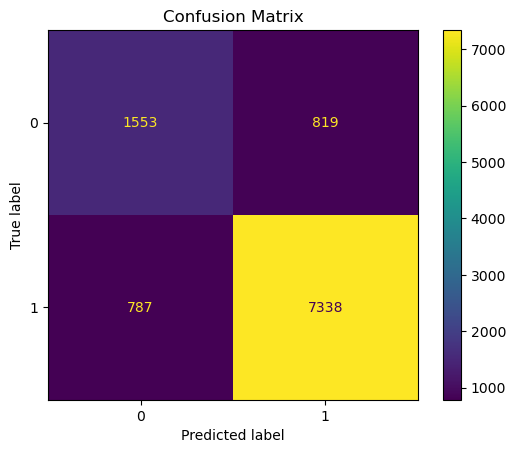

In [107]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
# plt.savefig('confusion_matrix.png')
plt.show()

## Classification Report

In [108]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      2372
           1       0.90      0.90      0.90      8125

    accuracy                           0.85     10497
   macro avg       0.78      0.78      0.78     10497
weighted avg       0.85      0.85      0.85     10497



## ROC Curve

In [ ]:
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# plt.savefig('roc_curve.png')
plt.show()

## Feature Importance

In [ ]:
importance = xgb_clf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(importance_df['Feature'][:20], importance_df['Importance'][:20])  # Show top 20 features
plt.xticks(rotation=90)
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
# plt.savefig('feature_importance.png')
plt.show()

## Save Model & Encoders

In [ ]:
with open('xgb_clf.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)

with open('feature_importance.pkl', 'wb') as f:
    pickle.dump(importance_df, f)

print("\n✅ Model training complete. Files saved successfully!")

# MODEL SCORING

In [1]:
import numpy as np
import pandas as pd
import pickle
import joblib

In [2]:
new_data = pd.read_csv('2025.csv', low_memory=False, encoding='ISO-8859-1')

In [3]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30431 entries, 0 to 30430
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STUDENT_NUMBER             30431 non-null  int64  
 1   STUDENT_NAME               30431 non-null  object 
 2   GENDER                     30431 non-null  object 
 3   HOME_LANGUAGE              30431 non-null  object 
 4   LANGUAGE_NAME              30431 non-null  object 
 5   ETHNIC_GROUP_NAME          30429 non-null  object 
 6   STATS_ETHNIC_GROUP         30429 non-null  object 
 7   BIRTHDATE                  30431 non-null  object 
 8   STUDENT_TYPE               30431 non-null  object 
 9   QUALIFICATION_CODE         30431 non-null  object 
 10  QUALIFICATION_NAME         30431 non-null  object 
 11  FTEN_STATUS_THIS_YEAR      30431 non-null  object 
 12  DEPARTMENT_NAME            30431 non-null  object 
 13  FACULTY_SCHOOL_NAME        30431 non-null  obj

In [4]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from datetime import datetime
import pickle

# --- Load New Data ---
new_data = pd.read_csv('2025.csv', low_memory=False, encoding='ISO-8859-1')

# --- Convert BIRTHDATE to datetime & Compute AGE ---
new_data['BIRTHDATE'] = pd.to_datetime(new_data['BIRTHDATE'], errors='coerce')
current_year = datetime.now().year
new_data['AGE'] = current_year - new_data['BIRTHDATE'].dt.year
mean_age = new_data['AGE'].mean()
new_data['AGE'].fillna(mean_age, inplace=True)

# --- Drop Unnecessary Columns ---
columns_to_drop = [
    'ETHNIC_GROUP_NAME', 'STUDENT_TYPE', 'QUALIFICATION_CODE', 'QUALIFICATION_NAME',
    'FACULTY_SCHOOL_NAME', 'SECONDARY_SCHOOL_NAME', 'RESULT_DESCRIPTION', 'SECONDARY_SCHOOL',
    'PASS_FAIL', 'STUDENT_NUMBER', 'STUDENT_NAME', 'ACADEMIC_YEAR', 'TITLE', 'INITIALS','ProvinceCD','SUCCESS',
    'BIRTHDATE', 'DEPARTMENT_NAME', 'OFFERING_TYPE_CODE', 'TRANSACTION_DATE', 'QUALIFICATION_TYPE',
    'STATS_ETHNIC_GROUP', 'FIRST_NAMES', 'SURNAME', 'FINAL_MARK', 'MARITAL_STATUS', 'Educators2023', 'GIS_Latitude', 'GIS_Longitude', 'Learners2023', 'NatEmis',
    'HOME_LANGUAGE','EXAM_MARK','HOME_LANGUAGE'
]
new_data_cleaned = new_data.drop(columns=[col for col in columns_to_drop if col in new_data.columns])

# --- Handle Missing Features (Funding, NSFAS, Residence) ---
safe_defaults = {
    'AMOUNT_AWARDED': -1,   # Funding still being finalized
    'NSFAS_BURSARY_Y_N': 'UNKNOWN',  # If missing, we assume it's still pending
    'RESIDENCE': 0  # Default to non-residence if unknown
}
for col, default_value in safe_defaults.items():
    if col not in new_data_cleaned:
        new_data_cleaned[col] = default_value

# --- Handle RESIDENCE Column ---
new_data_cleaned['RESIDENCE'] = new_data_cleaned['RESIDENCE'].notna().astype(int)

# --- Encode LANGUAGE_NAME (XHOSA = 1, Others = 2) ---
new_data_cleaned['LANGUAGE_NAME'] = new_data_cleaned['LANGUAGE_NAME'].apply(lambda x: 1 if x == 'XHOSA' else 2)

# --- Encode STUDENT_FOUNDATION (Y=1, N=0) ---
new_data_cleaned['STUDENT_FOUNDATION'] = new_data_cleaned['STUDENT_FOUNDATION'].map({'Y': 1, 'N': 0})
new_data_cleaned['STUDENT_FOUNDATION'].fillna(0, inplace=True)

# --- Ensure TEST_MARK and Indicator Feature ---
new_data['TEST_MARK_AVAILABLE'] = new_data['TEST_MARK'].notna().astype(int)
new_data['TEST_MARK'].fillna(-1, inplace=True)


# --- Fill Missing Values for Specific Columns ---
fillna_with_minus1 = ['MATRIC_SYMBOL', 'MATRIC_RATIO', 'AMOUNT_AWARDED','AGE']
for col in fillna_with_minus1:
    if col in new_data_cleaned:
        new_data_cleaned[col].fillna(-1, inplace=True)

# Fill numerical missing values with mean from training data
with open('training_data_means.pkl', 'rb') as f:
    training_means = pickle.load(f)

numerical_cols = new_data_cleaned.select_dtypes(include=['float64', 'int64']).columns.difference(fillna_with_minus1)
for col in numerical_cols:
    if col in new_data_cleaned:
        new_data_cleaned[col].fillna(training_means.get(col, 0), inplace=True)  # Default to 0 if not in means

# --- Label Encode Categorical Variables ---
categorical_columns = ['GENDER', 'FTEN_STATUS_THIS_YEAR', 'MATRIC_TYPE_DESCRIPTION', 
                        'NATIONAL_LEVEL_DESC', 'NSFAS_BURSARY_Y_N', 'OFFERING_TYPE']

with open('label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

for column in categorical_columns:
    if column in new_data_cleaned:
        le = label_encoders[column]
        new_data_cleaned[column] = new_data_cleaned[column].apply(lambda x: le.transform([x])[0] if x in le.classes_ else le.classes_.size)
    else:
        new_data_cleaned[column] = 0  # Default for missing categorical columns

# --- One-Hot Encoding for CAMPUS_NAME ---
with open('one_hot_encoder.pkl', 'rb') as f:
    one_hot_encoder = pickle.load(f)

if 'CAMPUS_NAME' in new_data_cleaned:
    campus_encoded = one_hot_encoder.transform(new_data_cleaned[['CAMPUS_NAME']])
    campus_encoded_df = pd.DataFrame(campus_encoded, columns=one_hot_encoder.get_feature_names_out(['CAMPUS_NAME']), index=new_data_cleaned.index)
    new_data_cleaned.drop('CAMPUS_NAME', axis=1, inplace=True)
    new_data_cleaned = pd.concat([new_data_cleaned, campus_encoded_df], axis=1)

# --- Ensure Feature Consistency with Trained Model ---
with open('feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

for col in feature_names:
    if col not in new_data_cleaned:
        new_data_cleaned[col] = 0  # Add missing columns with default value

new_data_cleaned = new_data_cleaned[feature_names]

# --- Scale Numerical Features ---
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

new_data_cleaned[numerical_cols] = scaler.transform(new_data_cleaned[numerical_cols])

# --- Load Trained Model & Perform Predictions ---
model = joblib.load('xgb_clf.pkl')
class_predictions = model.predict(new_data_cleaned)
probs = model.predict_proba(new_data_cleaned)[:, 1] * 100  # Probability of success

# --- Define Success Score Binning ---
def binning(probabilities):
    return ['Very Low' if p < 20 else 
            'Low' if 20 <= p < 50 else 
            'Moderate' if 50 <= p < 75 else 
            'High' if 75 <= p < 85 else 
            'Very High' for p in probabilities]

new_data_cleaned['Prediction'] = class_predictions
new_data_cleaned['Probability'] = probs
new_data_cleaned['Success_Scores'] = binning(probs)

def actionable_insights(row):
    insights = []
    if row['Success_Scores'] in ['Very Low', 'Low']:
        if row.get('NSFAS_BURSARY_Y_N') == 0:
            insights.append("Explore Financial Literacy Workshops.")
        if row.get('FTEN_STATUS_THIS_YEAR') == 1 or row.get('QUINTILE') in ['Q1', 'Q2', 'Q3'] or row.get('NoFeeSchool') == 'YES' or row.get('MATRIC_SYMBOL', 100) < 30:
            insights.append("Join Academic Support Programs.")
        if row.get('SUBJECT_FAILED', 0) > 1 and row.get('GENDER', 0) == 1:
            insights.append("Join the MALE Student Success Program.")
        if row.get('SUBJECT_FAILED', 0) > 3:
            insights.append("Attend the Time Management & Coping Skills Workshops.")
            
        if not insights:
            insights.append("Consult with an advisor for personalized guidance and support.")
    else:
        insights.append("Maintain your positive trajectory towards success.")
    return '; '.join(insights)
new_data_cleaned['Actionable Insights'] = new_data_cleaned.apply(actionable_insights, axis=1)


# --- Define Outcome Based on Success Scores ---
new_data_cleaned['Outcome'] = new_data_cleaned['Success_Scores'].apply(lambda x: 'At Risk' if x in ['Very Low', 'Low'] else 'On Track')

# --- Merge Insights & Scores with Original Data ---
final_data = pd.concat([new_data, new_data_cleaned[['Prediction', 'Probability', 'Success_Scores', 'Actionable Insights', 'Outcome']]], axis=1)

# --- Save Final Data ---
final_data.to_csv('updated_student_data_with_insights.csv', index=False)

print("✅ Updated data with actionable insights saved successfully.")


✅ Updated data with actionable insights saved successfully.


In [5]:
final_data

STUDENT_NUMBER      STUDENT_NAME GENDER HOME_LANGUAGE LANGUAGE_NAME  \
0           221175911      MR NK NDYEBO      M             E       ENGLISH   
1           219334889      MISS A JEKWA      F             K         XHOSA   
2           220141037   MISS A FUDUMELE      F             K         XHOSA   
3           222374217      MISS S LANGA      F             K         XHOSA   
4           240507568        MR A PENDU      M             K         XHOSA   
...               ...               ...    ...           ...           ...   
30426       240003985  MISS ES LWALWENI      F             K         XHOSA   
30427       240053052     MISS A MANONO      F             K         XHOSA   
30428       240228251       MISS S Nunu      F             K         XHOSA   
30429       230748090   MISS K JIKIJELA      F             K         XHOSA   
30430       222579269      MS A MAZONDO      F             K         XHOSA   

      ETHNIC_GROUP_NAME STATS_ETHNIC_GROUP  BIRTHDATE STUDENT_TYPE  \
0                 BLACK            AFRICAN 2001-07-17            N   
1                 BLACK            AFRICAN 1997-08-05            N   
2                 BLACK            AFRICAN 2000-11-11            N   
3                 BLACK            AFRICAN 2001-11-15            N   
4                 BLACK            AFRICAN 2003-01-02            N   
...                 ...                ...        ...          ...   
30426             BLACK            AFRICAN 2002-10-07            N   
30427             BLACK            AFRICAN 2004-11-01            N   
30428             BLACK            AFRICAN 2004-03-27            N   
30429             BLACK            AFRICAN 2004-06-30            N   
30430             BLACK            AFRICAN 2003-07-27            N   

      QUALIFICATION_CODE  ... NoFeeSchool Rural_Urban QUINTILE AGE  \
0                 W62005  ...         YES       Urban       Q2  24   
1                 W63006  ...         YES       Urban       Q3  28   
2                 W61026  ...         NaN         NaN      NaN  25   
3                 W64005  ...         YES       Rural       Q3  24   
4                 W64021  ...         YES       Rural       Q1  22   
...                  ...  ...         ...         ...      ...  ..   
30426             W61016  ...         YES       Rural       Q2  23   
30427             W62011  ...         YES       Rural       Q1  21   
30428             W66001  ...         NaN         NaN      NaN  21   
30429             W62011  ...         NaN         NaN      NaN  21   
30430             W63002  ...         NaN         NaN      NaN  22   

      TEST_MARK_AVAILABLE Prediction Probability  Success_Scores  \
0                       0          1   79.004059            High   
1                       0          1   60.957672        Moderate   
2                       0          0   39.105537             Low   
3                       0          1   86.841049       Very High   
4                       0          1   86.575127       Very High   
...                   ...        ...         ...             ...   
30426                   0          0   37.520397             Low   
30427                   0          1   91.099556       Very High   
30428                   0          1   60.331581        Moderate   
30429                   0          1   94.870789       Very High   
30430                   0          1   70.838882        Moderate   

                                     Actionable Insights   Outcome  
0      Maintain your positive trajectory towards succ...  On Track  
1      Maintain your positive trajectory towards succ...  On Track  
2                        Join Academic Support Programs.   At Risk  
3      Maintain your positive trajectory towards succ...  On Track  
4      Maintain your positive trajectory towards succ...  On Track  
...                                                  ...       ...  
30426                    Join Academic Support Programs.   At Risk  
30427  Maintain you

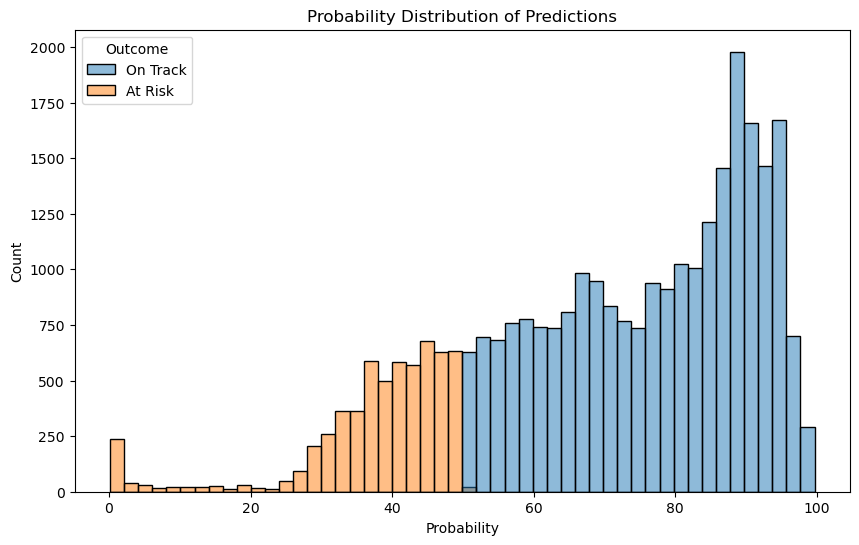

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data with probabilities
final_data['Outcome'] = final_data['Prediction'].apply(lambda x: 'On Track' if x == 1 else 'At Risk')

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=final_data, x='Probability', hue='Outcome', bins=50, kde=False, stat="count")

# Add title and labels
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('Count')

# Show the plot
plt.show()

In [7]:
final_data['Success_Scores'].value_counts()

Success_Scores
Moderate     9809
Very High    9761
Low          5563
High         4846
Very Low      452
Name: count, dtype: int64